<a href="https://colab.research.google.com/github/zayemnadeem/project-submission/blob/main/Zayem_iris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AIM:** To classify iris flowers into one of three species: (Setosa, Versicolor, Virginica) based on sepal and petal measurements.

**PROCEDURE/CODE:**

**Step 1: Import Libraries**

pandas and numpy: for data manipulation.

seaborn and matplotlib: for data visualization.

sklearn: for loading the dataset, splitting data, training the model, and evaluating it.

In [ ]:
# IMPORTING ALL THE NECESSARY LIBRARRIES

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Step 2: Load the Dataset**

Loading the Iris dataset using sklearn.datasets.load_iris(). It contains features like:

Sepal length & width

Petal length & width

In [ ]:
# LOADING THE DATATSET

iris = load_iris()
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['species'] = iris.target
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

**Step 3: Explore the Data**

Performing Exploratory Data Analysis (EDA) to understand the dataset:

head(): View the first few rows.

info(): Check data types and null values.

describe(): Get summary statistics.

In [ ]:
# EXPLORING THE DATA

print("First 5 rows of the dataset:")
print(df.head())
print("\nDataset info:")
print(df.info())
print("\nSummary statistics:")
print(df.describe())

First 5 rows of the dataset:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   species     

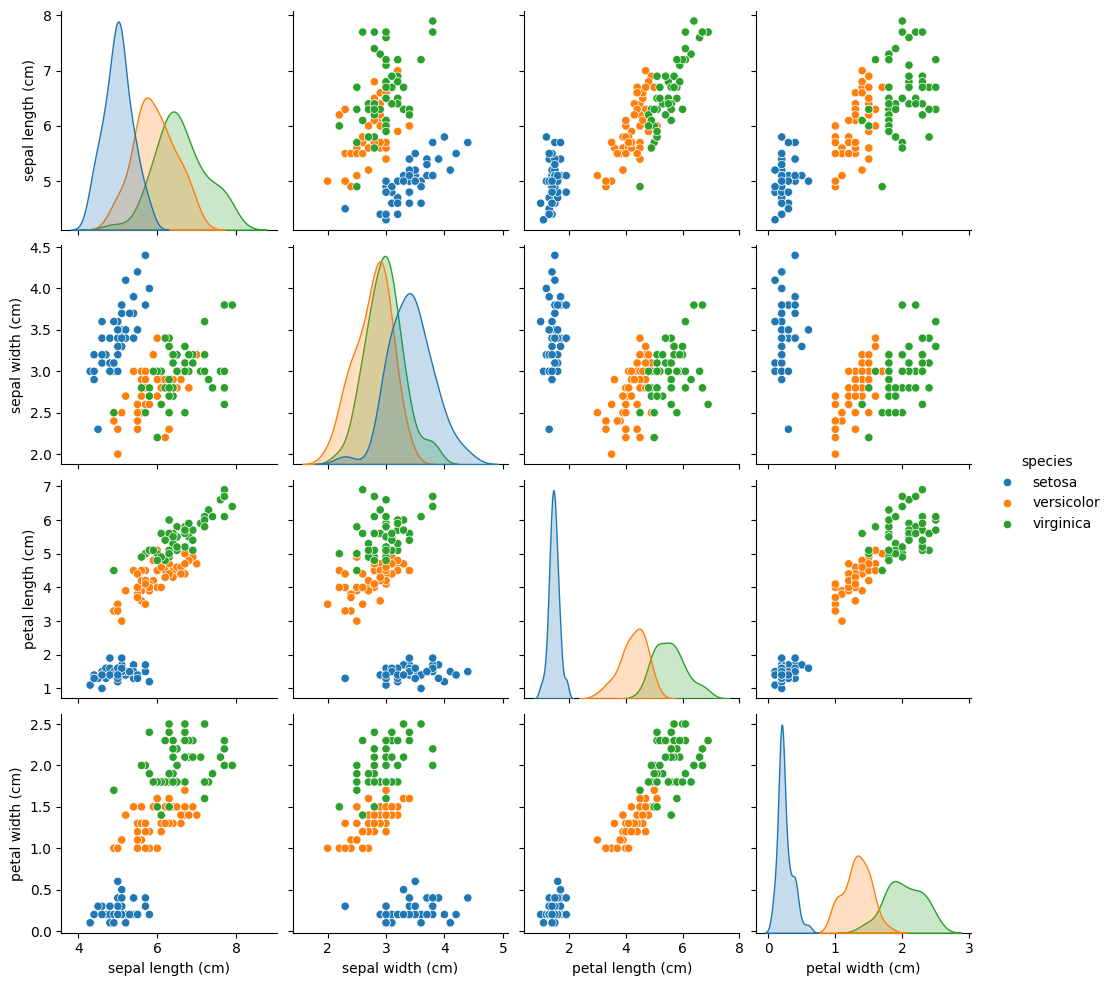

In [ ]:
# VISUALIZING THE DATA

sns.pairplot(df, hue='species')
plt.show()

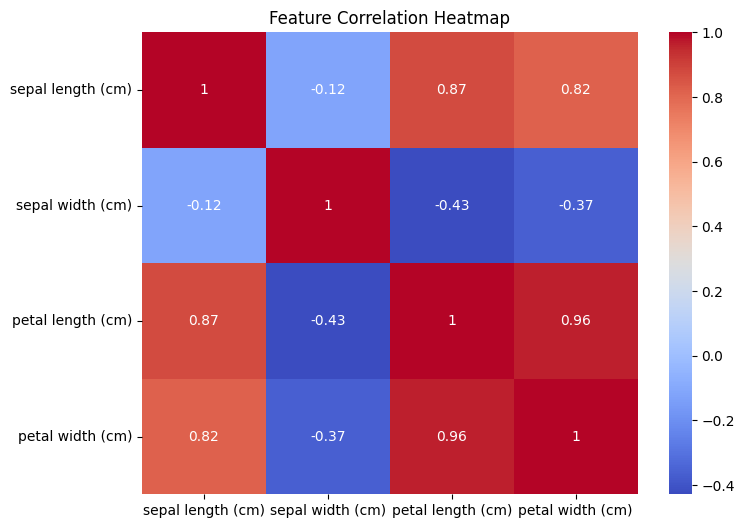

In [ ]:
# CORRELATION HEATMAP

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

**Step 4: Preprocess the Data**

preparing the data for training:

X: contains feature columns

y: contains labels (species)

We use train_test_split() to split the data into training (80%) and testing (20%) sets.

In [ ]:
# PREPROCESSING THE DATA

X = df.drop('species', axis=1)
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Step 5: Train the Model**

We use K-Nearest Neighbors (KNN) algorithm and train it using .fit(X_train, y_train)

In [ ]:
# TRAIN THE MODEL (USING K-NEAREST NEIGHBORS)

model = KNeighborsClassifier()
model.fit(X_train, y_train)

KNeighborsClassifier()

**Step 6: Evaluate the Model**

Using the trained model to predict on test data.

accuracy_score: How often the model was correct.

confusion_matrix: Shows correct vs incorrect classifications for each class.

classification_report: Includes precision, recall, F1-score.

In [ ]:
# EVALUATING THE MODEL

y_pred = model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy Score: 1.0

Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



**Step 7: Visualize Results**

plotting a confusion matrix using seaborn.heatmap() to visually check how well the model is performing.

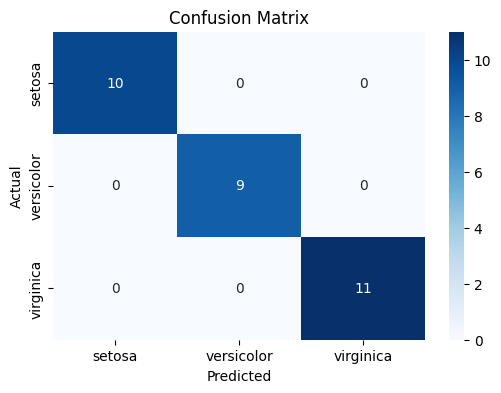

In [ ]:
# VISUALIZING THE CONFUSION MATRIX

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

**RESULT:** Thus, the KNN model achieves high accuracy and performs well across all three classes.